In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load datasets
students = pd.read_csv('students1.csv')
courses = pd.read_csv('courses1.csv')
industry_demand = pd.read_csv('industry_demand1.csv')

In [3]:
students.head(10)

,Id,Reg.No,Name of the Student,E-mail,Age,Course_id,Intrests
0,1,9921006758,ABHILASH M,9921004931@ku.ac.in,20,101,"data ethics, privacy"
1,2,9921006758,ANDE LAKSHMI LIKHITH,9921004931@ku.ac.in,20,102,"full stack development, react"
2,3,9921006758,ASARA VENKATA SAI ADVAITH,9921004931@ku.ac.in,20,103,"data science, machine learning"
3,4,9921006758,BOMMANA ANWESH REDDY,9921004931@ku.ac.in,20,104,"web development, javascript"
4,5,9921006758,DASIREDDY HARI TEJESWAR REDDY,9921004931@ku.ac.in,20,105,"cloud security, compliance"
5,6,9921006758,MAMIDI RANADHEER REDDY,9921004931@ku.ac.in,20,106,"graphic design, art"
6,7,9921006758,MITTAKORI SAI CHARAN GOUD,9921004931@ku.ac.in,20,101,"data ethics, privacy"
7,8,9921006758,BYSANI NAGA GURU SAI TEJA,9921004931@ku.ac.in,20,116,"data analysis, statistics"
8,9,9921006758,KUNAGUNTLA HARI KRISHNA,9921004931@ku.ac.in,20,114,"cyber security, networking"
9,10,9921006758,MALKANELLY SUMAHAS REDDY,9921004931@ku.ac.in,20,109,"mobile app development, android"


In [4]:
industry_demand.head(10)

,Skills
0,"data analysis, python, statistics"
1,"web development, html, css, javascript"
2,"graphic design, adobe photoshop, adobe illustr..."
3,"cyber security, ethical hacking, network security"
4,"cloud computing, aws, azure, devops"
5,"machine learning, deep learning, neural networks"
6,"mobile app development, android, ios"
7,"data visualization, tableau, power bi"
8,"business analysis, financial modeling, data re..."
9,"software engineering, algorithms, data structures"


In [5]:
courses.head(10)

,Course_id,Description
0,101,Introduction to Data Science
1,102,Web Development Bootcamp
2,103,Graphic Design Fundamentals
3,104,Cyber Security Essentials
4,105,Cloud Computing with AWS
5,106,Digital Marketing Strategies
6,107,Game Development with Unity
7,108,Software Engineering Principles
8,109,Business Analysis and Strategy
9,110,Artificial Intelligence and Robotics


In [6]:
# Data Preprocessing
students['Intrests'] = students['Intrests'].apply(lambda x: x.lower())
courses['Description'] = courses['Description'].apply(lambda x: x.lower())
industry_demand['Skills'] = industry_demand['Skills'].apply(lambda x: x.lower())

In [7]:
# Feature Engineering
vectorizer = TfidfVectorizer(stop_words='english')
students_tfidf = vectorizer.fit_transform(students['Intrests'])
courses_tfidf = vectorizer.transform(courses['Description'])
industry_tfidf = vectorizer.transform(industry_demand['Skills'])

In [8]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(students_tfidf, students['Course_id'], test_size=0.2, random_state=42)

# Random Forest

In [9]:
# Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Recommendation Engine
def recommend_courses(student_id):
    student_data = students[students['Id'] == student_id]
    
    # Check if student_data is empty
    if student_data.empty:
        print(f"No data found for student ID {student_id}. Please check the student ID.")
        return None
    
    student_tfidf = vectorizer.transform(student_data['Intrests']) 
    course_similarities = cosine_similarity(student_tfidf, courses_tfidf)
    recommended_courses = courses.iloc[np.argsort(-course_similarities[0])[:5]]
    return recommended_courses

def recommend_electives(student_id):
    student_data = students[students['Id'] == student_id] 
    
    # Check if student_data is empty
    if student_data.empty:
        print(f"No data found for student ID {student_id}. Please check the student ID.")
        return None
    
    student_tfidf = vectorizer.transform(student_data['Intrests'])  
    elective_similarities = cosine_similarity(student_tfidf, industry_tfidf)
    recommended_electives = industry_demand.iloc[np.argsort(-elective_similarities[0])[:5]]
    return recommended_electives

In [11]:
import numpy as np  
try:
    student_id = int(input("Enter the student ID: "))
except ValueError:
    print("Invalid input. Please enter a numerical student ID.")
    exit()

# Recommend courses and electives
recommended_courses = recommend_courses(student_id)
recommended_electives = recommend_electives(student_id)

# Display recommendations if available
if recommended_courses is not None:
    print("Recommended Courses:")
    print(recommended_courses)

if recommended_electives is not None:
    print("Recommended Electives:")
    print(recommended_electives)


Enter the student ID: 75
Recommended Courses:
    Course_id                        Description
14        115  introduction to augmented reality
0         101       introduction to data science
1         102           web development bootcamp
2         103        graphic design fundamentals
3         104          cyber security essentials
Recommended Electives:
                                      Skills
33        augmented reality, virtual reality
0          data analysis, python, statistics
23    full stack development, react, node.js
24  social media marketing, content creation
25                   big data, hadoop, spark


# Logistic Regression

In [12]:
# Importing the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(students_tfidf, students['Course_id'], test_size=0.2, random_state=42)

# Machine Learning Model (Logistic Regression)
model = LogisticRegression(max_iter=1000, random_state=42)  # Set max_iter to ensure convergence
model.fit(X_train, y_train)

# Recommendation Engine
def recommend_courses(student_id):
    student_data = students[students['Id'] == student_id]
    
    # Check if student_data is empty
    if student_data.empty:
        print(f"No data found for student ID {student_id}. Please check the student ID.")
        return None
    
    student_tfidf = vectorizer.transform(student_data['Intrests'])
    course_similarities = cosine_similarity(student_tfidf, courses_tfidf)
    recommended_courses = courses.iloc[np.argsort(-course_similarities[0])[:5]]
    return recommended_courses

def recommend_electives(student_id):
    student_data = students[students['Id'] == student_id] 
    
    # Check if student_data is empty
    if student_data.empty:
        print(f"No data found for student ID {student_id}. Please check the student ID.")
        return None
    
    student_tfidf = vectorizer.transform(student_data['Intrests'])
    elective_similarities = cosine_similarity(student_tfidf, industry_tfidf)
    recommended_electives = industry_demand.iloc[np.argsort(-elective_similarities[0])[:5]]
    return recommended_electives

import numpy as np  
try:
    student_id = int(input("Enter the student ID: "))
except ValueError:
    print("Invalid input. Please enter a numerical student ID.")
    exit()

# Recommend courses and electives
recommended_courses = recommend_courses(student_id)
recommended_electives = recommend_electives(student_id)

# Display recommendations if available
if recommended_courses is not None:
    print("Recommended Courses:")
    print(recommended_courses)

if recommended_electives is not None:
    print("Recommended Electives:")
    print(recommended_electives)


Enter the student ID: 17
Recommended Courses:
    Course_id                        Description
14        115  introduction to augmented reality
0         101       introduction to data science
1         102           web development bootcamp
2         103        graphic design fundamentals
3         104          cyber security essentials
Recommended Electives:
                                      Skills
33        augmented reality, virtual reality
0          data analysis, python, statistics
23    full stack development, react, node.js
24  social media marketing, content creation
25                   big data, hadoop, spark


C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


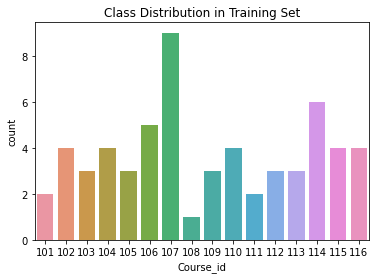

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution in y_train
sns.countplot(y_train)
plt.title("Class Distribution in Training Set")
plt.show()


# Visualisations

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


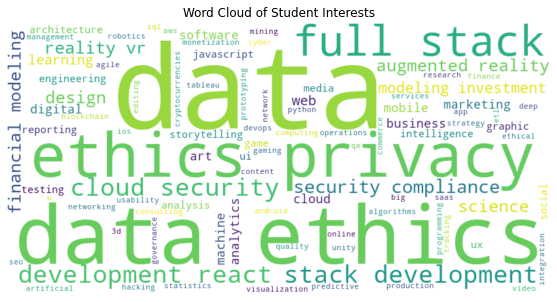

In [15]:
# 1. Students’ Interests Word Cloud
all_interests = ' '.join(students['Intrests'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_interests)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Student Interests")
plt.show()

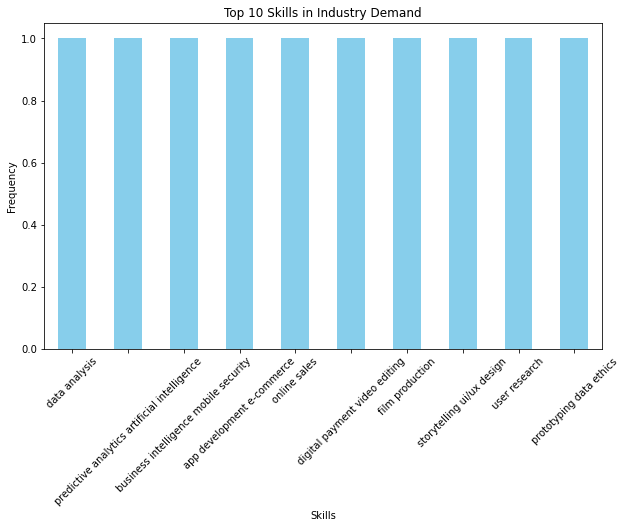

In [16]:
# 2. Top Skills in Industry Demand
skills = ' '.join(industry_demand['Skills'].dropna()).split(', ')
skill_counts = pd.Series(skills).value_counts()

plt.figure(figsize=(10, 6))
skill_counts[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Skills in Industry Demand")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()





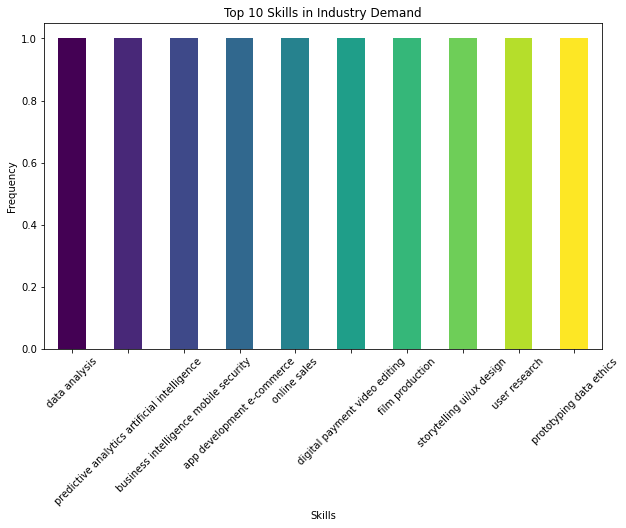

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(skill_counts[:10])))
skill_counts[:10].plot(kind='bar', color=colors)
plt.title("Top 10 Skills in Industry Demand")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


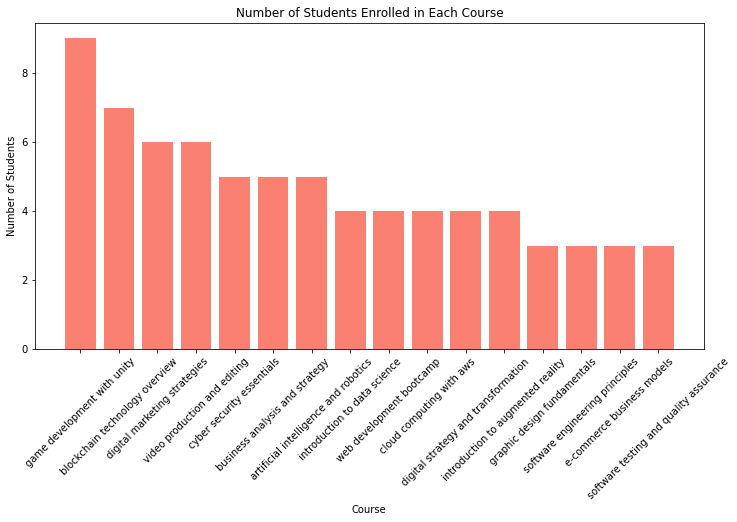

In [18]:
# 3. Courses and Enrollments
course_counts = students['Course_id'].value_counts().rename_axis('Course_id').reset_index(name='Student Count')
course_data = pd.merge(course_counts, courses, on='Course_id', how='left')

plt.figure(figsize=(12, 6))
plt.bar(course_data['Description'], course_data['Student Count'], color='salmon')
plt.title("Number of Students Enrolled in Each Course")
plt.xlabel("Course")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

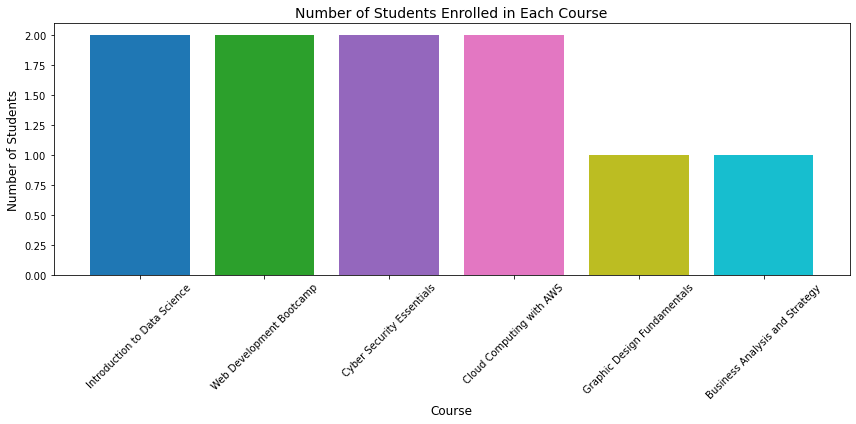

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
students = pd.DataFrame({
    'Course_id': [101, 102, 103, 104, 105, 101, 102, 109, 104, 105]
})
courses = pd.DataFrame({
    'Course_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Description': [
        'Introduction to Data Science', 'Web Development Bootcamp', 
        'Graphic Design Fundamentals', 'Cyber Security Essentials', 
        'Cloud Computing with AWS', 'Digital Marketing Strategies',
        'Game Development with Unity', 'Software Engineering Principles', 
        'Business Analysis and Strategy', 'Artificial Intelligence and Robotics'
    ]
})

# Group and merge data
course_counts = students['Course_id'].value_counts().rename_axis('Course_id').reset_index(name='Student Count')
course_data = pd.merge(course_counts, courses, on='Course_id', how='left')

# Generate unique colors for bars
colors = plt.cm.tab10(np.linspace(0, 1, len(course_data)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(course_data['Description'], course_data['Student Count'], color=colors)
plt.title("Number of Students Enrolled in Each Course", fontsize=14)
plt.xlabel("Course", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


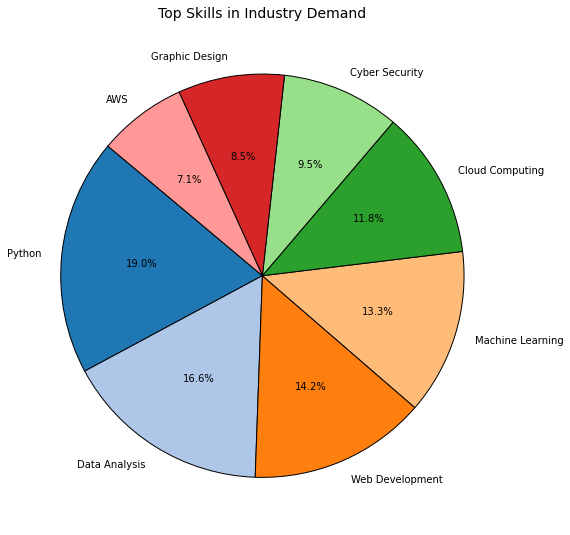

In [20]:
import matplotlib.pyplot as plt

# Sample data for skills and their counts
skills = ['Python', 'Data Analysis', 'Web Development', 'Machine Learning', 
          'Cloud Computing', 'Cyber Security', 'Graphic Design', 'AWS']
counts = [40, 35, 30, 28, 25, 20, 18, 15]  # Corresponding skill frequencies

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=skills,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors[:len(skills)],  # Use a visually pleasing colormap
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Top Skills in Industry Demand", fontsize=14)
plt.tight_layout()
plt.show()


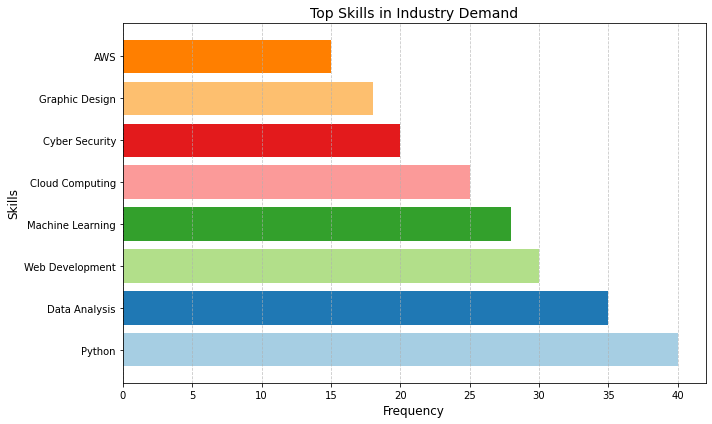

In [21]:
import matplotlib.pyplot as plt

# Sample data for skills and their counts
skills = ['Python', 'Data Analysis', 'Web Development', 'Machine Learning', 
          'Cloud Computing', 'Cyber Security', 'Graphic Design', 'AWS']
counts = [40, 35, 30, 28, 25, 20, 18, 15]  # Corresponding skill frequencies

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color=plt.cm.Paired.colors[:len(skills)])
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.title("Top Skills in Industry Demand", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


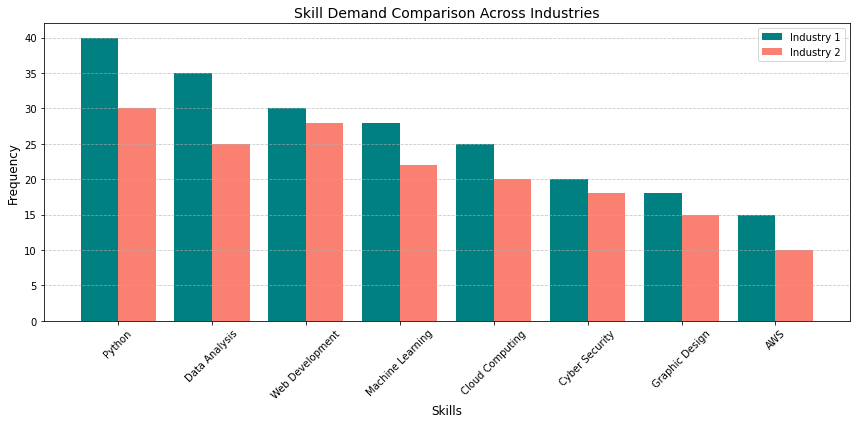

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for skills and their counts across two industries
skills = ['Python', 'Data Analysis', 'Web Development', 'Machine Learning', 
          'Cloud Computing', 'Cyber Security', 'Graphic Design', 'AWS']
industry1_counts = [40, 35, 30, 28, 25, 20, 18, 15]  # Counts for Industry 1
industry2_counts = [30, 25, 28, 22, 20, 18, 15, 10]  # Counts for Industry 2

# Bar width and positions
x = np.arange(len(skills))
bar_width = 0.4

# Plot the grouped bars
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, industry1_counts, width=bar_width, label='Industry 1', color='teal')
plt.bar(x + bar_width/2, industry2_counts, width=bar_width, label='Industry 2', color='salmon')

# Add titles and labels
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Skill Demand Comparison Across Industries", fontsize=14)
plt.xticks(ticks=x, labels=skills, rotation=45, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


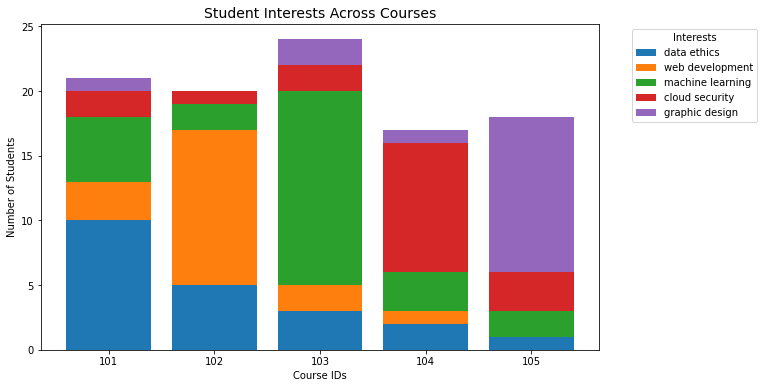

In [23]:
import numpy as np

# Data setup
courses = ["101", "102", "103", "104", "105"]
interests = ["data ethics", "web development", "machine learning", "cloud security", "graphic design"]
interest_counts = [
    [10, 5, 3, 2, 1],  # Data ethics
    [3, 12, 2, 1, 0],  # Web development
    [5, 2, 15, 3, 2],  # Machine learning
    [2, 1, 2, 10, 3],  # Cloud security
    [1, 0, 2, 1, 12]   # Graphic design
]

# Stacked bar chart
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(courses))
for i, count in enumerate(interest_counts):
    plt.bar(courses, count, bottom=bottom, label=interests[i])
    bottom += np.array(count)

plt.title("Student Interests Across Courses", fontsize=14)
plt.xlabel("Course IDs")
plt.ylabel("Number of Students")
plt.legend(title="Interests", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


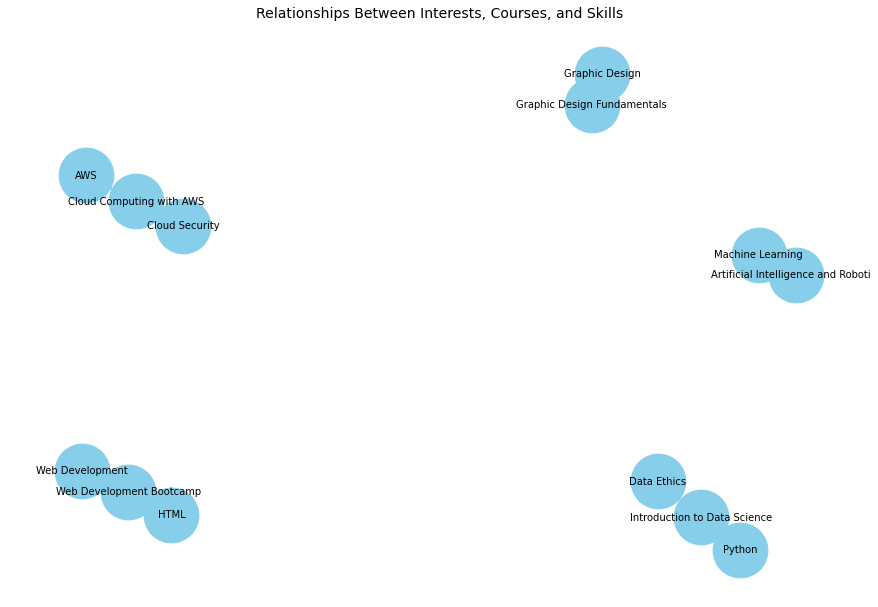

In [24]:
import networkx as nx

# Example network graph
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([
    ("Data Ethics", "Introduction to Data Science"),
    ("Web Development", "Web Development Bootcamp"),
    ("Machine Learning", "Artificial Intelligence and Robotics"),
    ("Cloud Security", "Cloud Computing with AWS"),
    ("Graphic Design", "Graphic Design Fundamentals"),
    ("Python", "Introduction to Data Science"),
    ("AWS", "Cloud Computing with AWS"),
    ("HTML", "Web Development Bootcamp")
])

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', font_size=10, node_size=3000, edge_color='gray')
plt.title("Relationships Between Interests, Courses, and Skills", fontsize=14)
plt.show()


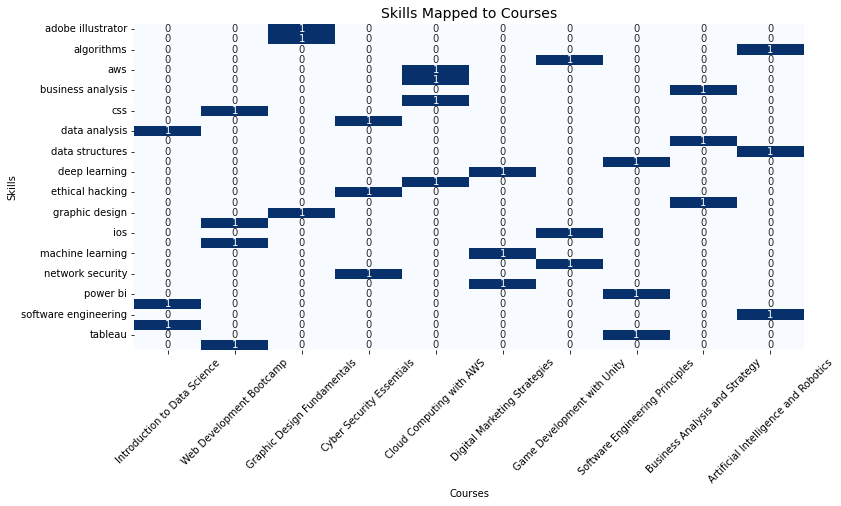

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data
course_data = ["Introduction to Data Science", "Web Development Bootcamp", "Graphic Design Fundamentals", 
               "Cyber Security Essentials", "Cloud Computing with AWS", "Digital Marketing Strategies", 
               "Game Development with Unity", "Software Engineering Principles", 
               "Business Analysis and Strategy", "Artificial Intelligence and Robotics"]
skills_data = [
    ['data analysis', 'python', 'statistics'], 
    ['web development', 'html', 'css', 'javascript'],
    ['graphic design', 'adobe photoshop', 'adobe illustrator'],
    ['cyber security', 'ethical hacking', 'network security'],
    ['cloud computing', 'aws', 'azure', 'devops'],
    ['machine learning', 'deep learning', 'neural networks'],
    ['mobile app development', 'android', 'ios'],
    ['data visualization', 'tableau', 'power bi'],
    ['business analysis', 'financial modeling', 'data representation'],
    ['software engineering', 'algorithms', 'data structures']
]

# One-hot encode skills
unique_skills = sorted(set(skill for skill_list in skills_data for skill in skill_list))
skill_df = pd.DataFrame(0, index=course_data, columns=unique_skills)
for i, skills in enumerate(skills_data):
    skill_df.loc[course_data[i], skills] = 1

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(skill_df.T, annot=True, cmap="Blues", cbar=False)
plt.title("Skills Mapped to Courses", fontsize=14)
plt.xlabel("Courses")
plt.ylabel("Skills")
plt.xticks(rotation=45)
plt.show()
